In [58]:
library(tidyverse)
library(ggplot2)

In [29]:
read_csv('country,     year,  cases, population
Afghanistan,  1999,    745,   19987071
Afghanistan,  2000,   2666,   20595360
Brazil,       1999,  37737,  172006362
Brazil,       2000,  80488,  174504898
China,        1999, 212258, 1272915272
China,        2000, 213766, 1280428583') -> table1

In [34]:
table1

country,year,cases,population
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [15]:
# 연도별 case 합
table1  %>% count(year, wt = cases)

year,n
1999,250740
2000,296920


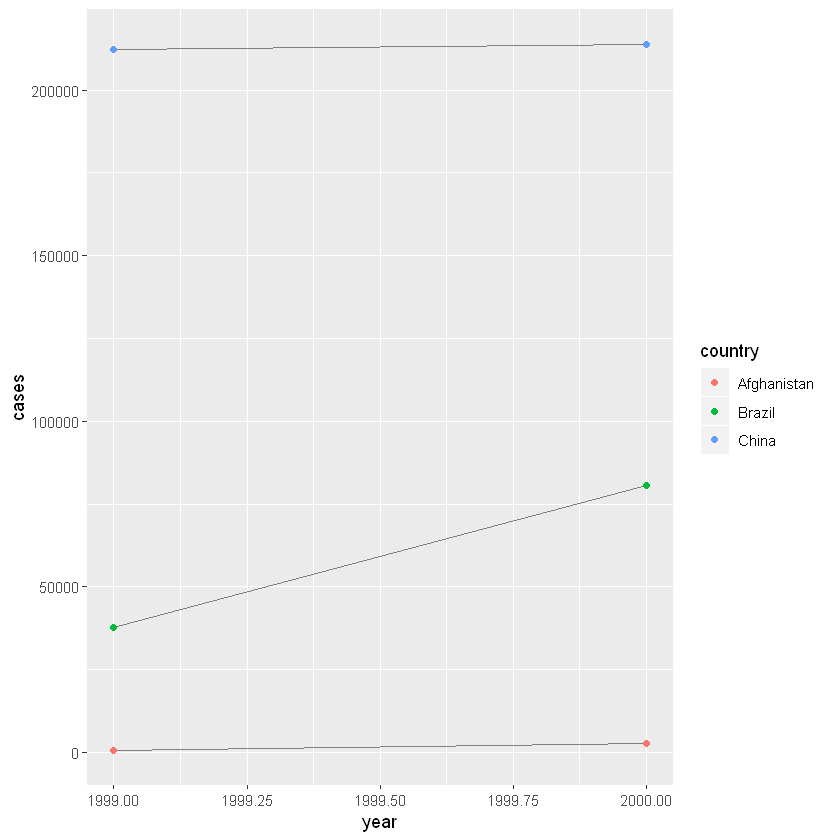

In [23]:
table1  %>% ggplot(aes(year, cases, group= country, color = country)) + 
    geom_line(color = "grey50") + geom_point()

country,year,cases
Afghanistan,year,`1999`
Brazil,year,`1999`
China,year,`1999`
Afghanistan,year,`2000`
Brazil,year,`2000`
China,year,`2000`
Afghanistan,cases,745
Brazil,cases,37737
China,cases,212258
Afghanistan,cases,2666


In [80]:
tidyr::table4a  %>% gather(2:3, key="year", value = "cases") -> table4a
table4a

country,year,cases
Afghanistan,1999,745
Brazil,1999,37737
China,1999,212258
Afghanistan,2000,2666
Brazil,2000,80488
China,2000,213766


In [78]:
tidyr::table4a

country,1999,2000
Afghanistan,745,2666
Brazil,37737,80488
China,212258,213766


In [81]:
tidyr::table4b  %>% gather(2:3, key = "year", value = "population") -> table4b

In [83]:
table4b

country,year,population
Afghanistan,1999,19987071
Brazil,1999,172006362
China,1999,1272915272
Afghanistan,2000,20595360
Brazil,2000,174504898
China,2000,1280428583


In [82]:
left_join(table4a, table4b)

Joining, by = c("country", "year")


country,year,cases,population
Afghanistan,1999,745,19987071
Brazil,1999,37737,172006362
China,1999,212258,1272915272
Afghanistan,2000,2666,20595360
Brazil,2000,80488,174504898
China,2000,213766,1280428583


In [84]:
table2

country,year,type,count
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258
China,1999,population,1272915272


In [61]:
table2  %>% spread(key = type, value = count)

country,year,cases,population
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [63]:
(stocks <- tibble(
  year   = c(2015, 2015, 2016, 2016),
  half  = c(   1,    2,     1,    2),
  return = c(1.88, 0.59, 0.92, 0.17)
))


year,half,return
2015,1,1.88
2015,2,0.59
2016,1,0.92
2016,2,0.17


In [66]:
stocks %>% 
  spread(year, return) %>%   gather("year", "return", `2015`:`2016`)

half,year,return
1,2015,1.88
2,2015,0.59
1,2016,0.92
2,2016,0.17


In [67]:
table4a  %>%  

country,year,cases
Afghanistan,year,`1999`
Brazil,year,`1999`
China,year,`1999`
Afghanistan,year,`2000`
Brazil,year,`2000`
China,year,`2000`
Afghanistan,cases,745
Brazil,cases,37737
China,cases,212258
Afghanistan,cases,2666


### 12.4 Separating and uniting

In [69]:
table3  %>% separate(rate, into = c("cases", "population"))

country,year,cases,population
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [71]:
table3  %>% separate(rate, into = c("cases", "population"), sep = "/", convert = T)

country,year,cases,population
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [72]:
table3  %>% separate(year, into = c("century", "year"), sep = 2)

country,century,year,rate
Afghanistan,19,99,745/19987071
Afghanistan,20,00,2666/20595360
Brazil,19,99,37737/172006362
Brazil,20,00,80488/174504898
China,19,99,212258/1272915272
China,20,00,213766/1280428583


In [96]:
table5  %>% unite(new, century, year, sep= "", remove = T)

country,new,century,year,rate
Afghanistan,1999,19,99,745/19987071
Afghanistan,2000,20,00,2666/20595360
Brazil,1999,19,99,37737/172006362
Brazil,2000,20,00,80488/174504898
China,1999,19,99,212258/1272915272
China,2000,20,00,213766/1280428583


### 12.4.3

In [90]:
tibble(x = c("a,b,c", "d,e,f,g", "h,i,j")) %>% 
  separate(x, c("one", "two", "three"))

Warning message:
"Expected 3 pieces. Additional pieces discarded in 1 rows [2]."

one,two,three
a,b,c
d,e,f
h,i,j


In [94]:
tibble(x = c("a,b,c", "d,e", "f,g,i")) %>% 
  separate(x, c("one", "two", "three"), fill = "left")

Warning message:
"Expected 3 pieces. Missing pieces filled with `NA` in 1 rows [2]."

one,two,three
a,b,c
d,e,NA
f,g,i


### 12.5 결측값

In [98]:
(stocks <- tibble(
  year   = c(2015, 2015, 2015, 2015, 2016, 2016, 2016),
  qtr    = c(   1,    2,    3,    4,    2,    3,    4),
  return = c(1.88, 0.59, 0.35,   NA, 0.92, 0.17, 2.66)
))

year,qtr,return
2015,1,1.88
2015,2,0.59
2015,3,0.35
2015,4,NA
2016,2,0.92
2016,3,0.17
2016,4,2.66


In [101]:
stocks  %>% spread(qtr, return)

year,1,2,3,4
2015,1.88,0.59,0.35,NA
2016,NA,0.92,0.17,2.66


In [105]:
stocks  %>% complete(year, qtr)

year,qtr,return
2015,1,1.88
2015,2,0.59
2015,3,0.35
2015,4,NA
2016,1,NA
2016,2,0.92
2016,3,0.17
2016,4,2.66


In [109]:
(treatment <- tribble(
  ~ person,           ~ treatment, ~response,
  "Derrick Whitmore", 1,           7,
  NA,                 2,           10,
  NA,                 3,           9,
  "Katherine Burke",  1,           4
))

person,treatment,response
Derrick Whitmore,1,7
NA,2,10
NA,3,9
Katherine Burke,1,4


In [113]:
treatment  %>% fill(person, .direction = "up")

person,treatment,response
Derrick Whitmore,1,7
Katherine Burke,2,10
Katherine Burke,3,9
Katherine Burke,1,4


In [114]:
treatment  %>% fill(person)

person,treatment,response
Derrick Whitmore,1,7
Derrick Whitmore,2,10
Derrick Whitmore,3,9
Katherine Burke,1,4


In [116]:
who  %>% head()

country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
Afghanistan,AF,AFG,1980,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AF,AFG,1981,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AF,AFG,1982,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AF,AFG,1983,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AF,AFG,1984,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AF,AFG,1985,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [118]:
who  %>% gather(
    new_sp_m014:newrel_f65, 
    key = "key",
    value = "cases", 
    na.rm =T) -> who1

In [120]:
who1  %>% mutate(key = stringr::str_replace(key, "newrel", "new_rel")) -> who2

In [123]:
(who3 <- who2  %>% separate(key, c("new", "type", "sexage"), sep = "_"))

country,iso2,iso3,year,new,type,sexage,cases
Afghanistan,AF,AFG,1997,new,sp,m014,0
Afghanistan,AF,AFG,1998,new,sp,m014,30
Afghanistan,AF,AFG,1999,new,sp,m014,8
Afghanistan,AF,AFG,2000,new,sp,m014,52
Afghanistan,AF,AFG,2001,new,sp,m014,129
Afghanistan,AF,AFG,2002,new,sp,m014,90
Afghanistan,AF,AFG,2003,new,sp,m014,127
Afghanistan,AF,AFG,2004,new,sp,m014,139
Afghanistan,AF,AFG,2005,new,sp,m014,151
Afghanistan,AF,AFG,2006,new,sp,m014,193


In [125]:
who3  %>% select(-c(new, iso2, iso3)) -> who4

In [129]:
who4  %>% separate(sexage, c("sex", "age"), sep = 1) -> who5
head(who5)

country,year,type,sex,age,cases
Afghanistan,1997,sp,m,014,0
Afghanistan,1998,sp,m,014,30
Afghanistan,1999,sp,m,014,8
Afghanistan,2000,sp,m,014,52
Afghanistan,2001,sp,m,014,129
Afghanistan,2002,sp,m,014,90


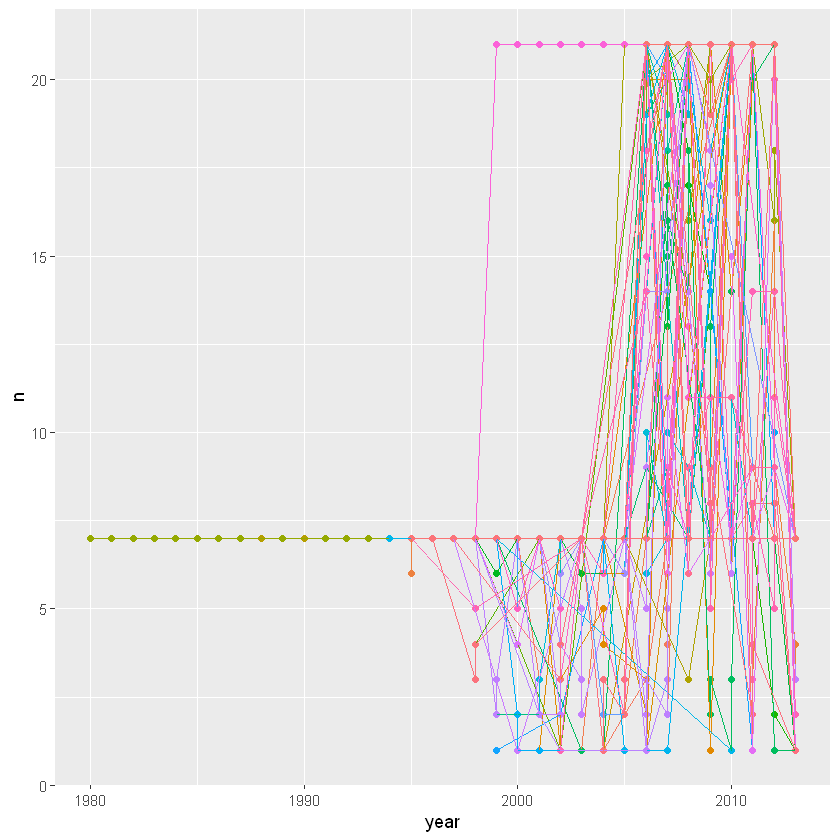

In [135]:
who5  %>% group_by(country, year, sex)  %>% 
    summarize(n = n())  %>% 
    ggplot(aes(year, n, color = country)) + geom_point(show.legend = F) + geom_line(show.legend = F)